This claimaints dataset is from kaggle. The main aim is to predict whether the person has taken attorney or not.

Here I used Logistic Regression model and predicted the values and also checked the accuracy scores.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
claimaints=pd.read_csv("C:/Users/sairam/Downloads/claimants.csv")
claimaints

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [81]:
claimaints.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
#attorney-0--->yes, attorney-1----->not represented by an attorny
#clmsex-0--->male,1---->female
#clminsur=driver of claimaints was uninsuranced 0->yes,1->no
#seatbelt=whether claimaint was wearing seatbelt  0->yes, 1->no
#clmage=claimaints age
#loss=loss amount

In [82]:
claimaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [83]:
claimaints.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [7]:
claimaints.drop(['CASENUM'],inplace=True,axis=1)

In [8]:
claimaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [9]:
claimaints['ATTORNEY'].value_counts()

0    685
1    655
Name: ATTORNEY, dtype: int64

<AxesSubplot:xlabel='ATTORNEY', ylabel='count'>

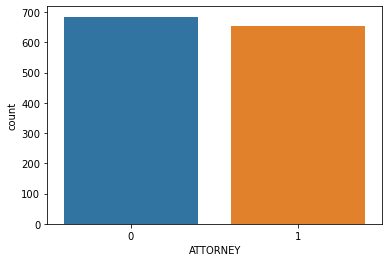

In [10]:
sns.countplot(x='ATTORNEY',data=claimaints)

In [11]:
pd.crosstab(claimaints.ATTORNEY,claimaints.CLMINSUR)

CLMINSUR,0.0,1.0
ATTORNEY,,
0,76,585
1,44,594


<AxesSubplot:xlabel='CLMSEX', ylabel='count'>

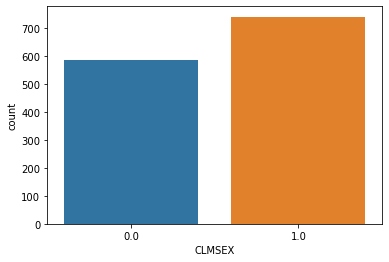

In [12]:
sns.countplot(x='CLMSEX',data=claimaints)

In [13]:
pd.crosstab(claimaints.CLMSEX,claimaints.CLMINSUR)

CLMINSUR,0.0,1.0
CLMSEX,,
0.0,65,501
1.0,55,669


<AxesSubplot:xlabel='CLMSEX'>

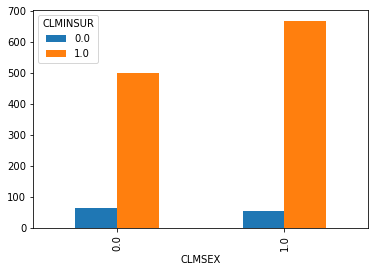

In [14]:
pd.crosstab(claimaints.CLMSEX,claimaints.CLMINSUR).plot(kind='bar')

<AxesSubplot:xlabel='SEATBELT', ylabel='count'>

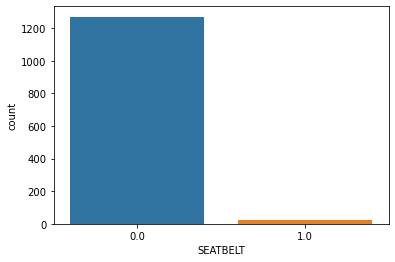

In [15]:
sns.countplot(x='SEATBELT',data=claimaints)

<AxesSubplot:xlabel='SEATBELT'>

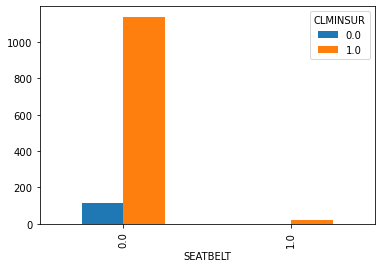

In [16]:
pd.crosstab(claimaints.SEATBELT,claimaints.CLMINSUR).plot(kind='bar')

In [17]:
claimaints.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [84]:
claimaints.CLMSEX.mode()

0    1.0
dtype: float64

In [85]:
claimaints['CLMSEX'].fillna(claimaints.CLMSEX.mode()[0],inplace=True)

In [86]:
claimaints.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX        0
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [21]:
claimaints.CLMINSUR.mode()

0    1.0
dtype: float64

In [87]:
claimaints['CLMINSUR'].fillna(claimaints.CLMINSUR.mode()[0],inplace=True)

In [88]:
claimaints.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [89]:
claimaints.SEATBELT.mode()

0    0.0
dtype: float64

In [90]:
claimaints['SEATBELT'].fillna(claimaints.SEATBELT.mode()[0],inplace=True)

In [91]:
claimaints.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

In [92]:
claimaints.CLMAGE.mean()

28.414422241529106

In [93]:
claimaints['CLMAGE'].fillna(claimaints.CLMAGE.mean(),inplace=True)

In [94]:
claimaints.isnull().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [96]:
claimaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1340 non-null   float64
 3   CLMINSUR  1340 non-null   float64
 4   SEATBELT  1340 non-null   float64
 5   CLMAGE    1340 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [97]:
x=claimaints.iloc[:,[1,2,3,4,5]]
y=claimaints.iloc[:,0]

In [98]:
x

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE
0,0,0.0,1.0,0.0,50.000000
1,1,1.0,0.0,0.0,18.000000
2,1,0.0,1.0,0.0,5.000000
3,0,0.0,1.0,1.0,31.000000
4,1,0.0,1.0,0.0,30.000000
...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.414422
1336,0,1.0,1.0,0.0,46.000000
1337,1,1.0,1.0,0.0,39.000000
1338,0,1.0,0.0,0.0,8.000000


In [99]:
y

0           5
1           3
2          66
3          70
4          96
        ...  
1335    34100
1336    34110
1337    34113
1338    34145
1339    34153
Name: CASENUM, Length: 1340, dtype: int64

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [79]:
x_train

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred
1211,1.0,1.0,0.0,9.000000,1.747,1
483,0.0,1.0,0.0,28.414422,0.370,1
45,1.0,1.0,0.0,28.414422,3.981,0
1200,0.0,0.0,0.0,15.000000,1.009,0
962,1.0,1.0,0.0,45.000000,0.350,1
...,...,...,...,...,...,...
31,0.0,1.0,0.0,28.414422,0.337,1
950,0.0,1.0,0.0,9.000000,0.300,1
1064,1.0,1.0,0.0,14.000000,1.650,1
742,1.0,1.0,0.0,8.000000,0.401,1


In [37]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [38]:
model1.coef_

array([[ 0.2506139 ,  0.46778709, -0.46421584,  0.00667035, -0.34058373]])

In [39]:
model1.intercept_

array([-0.00538616])

In [40]:
y_train

1211    1
483     1
45      1
1200    1
962     1
       ..
31      1
950     1
1064    0
742     1
595     0
Name: ATTORNEY, Length: 1072, dtype: int64

In [41]:
model1.predict_proba(x_train)

array([[0.45560517, 0.54439483],
       [0.3714692 , 0.6285308 ],
       [0.61142709, 0.38857291],
       ...,
       [0.43919332, 0.56080668],
       [0.34755508, 0.65244492],
       [0.77224967, 0.22775033]])

In [42]:
y_pred=model1.predict(x_train)
y_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [43]:
x_train['y_pred']=y_pred
x_train

<ipython-input-43-307c962a832c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['y_pred']=y_pred


,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred
1211,1.0,1.0,0.0,9.000000,1.747,1
483,0.0,1.0,0.0,28.414422,0.370,1
45,1.0,1.0,0.0,28.414422,3.981,0
1200,0.0,0.0,0.0,15.000000,1.009,0
962,1.0,1.0,0.0,45.000000,0.350,1
...,...,...,...,...,...,...
31,0.0,1.0,0.0,28.414422,0.337,1
950,0.0,1.0,0.0,9.000000,0.300,1
1064,1.0,1.0,0.0,14.000000,1.650,1
742,1.0,1.0,0.0,8.000000,0.401,1


In [44]:
pd.concat([x_train,y_train],axis=1)

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred,ATTORNEY
1211,1.0,1.0,0.0,9.000000,1.747,1,1
483,0.0,1.0,0.0,28.414422,0.370,1,1
45,1.0,1.0,0.0,28.414422,3.981,0,1
1200,0.0,0.0,0.0,15.000000,1.009,0,1
962,1.0,1.0,0.0,45.000000,0.350,1,1
...,...,...,...,...,...,...,...
31,0.0,1.0,0.0,28.414422,0.337,1,1
950,0.0,1.0,0.0,9.000000,0.300,1,1
1064,1.0,1.0,0.0,14.000000,1.650,1,0
742,1.0,1.0,0.0,8.000000,0.401,1,1


In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_train,y_pred)

array([[350, 198],
       [113, 411]], dtype=int64)

In [47]:
y_train.shape[0]

1072

In [48]:
sum(y_train==y_pred)/y_train.shape[0]

0.7098880597014925

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_train)

0.7098880597014925

In [50]:
#Test data

y_pred_test=model1.predict(x_test)
y_pred_test

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1], dtype=int64)

In [51]:
confusion_matrix(y_test,y_pred_test)

array([[ 73,  64],
       [ 26, 105]], dtype=int64)

In [52]:
accuracy_score(y_pred_test,y_test)

0.664179104477612

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.64      0.69       548
           1       0.67      0.78      0.73       524

    accuracy                           0.71      1072
   macro avg       0.72      0.71      0.71      1072
weighted avg       0.72      0.71      0.71      1072



In [54]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.53      0.62       137
           1       0.62      0.80      0.70       131

    accuracy                           0.66       268
   macro avg       0.68      0.67      0.66       268
weighted avg       0.68      0.66      0.66       268



In [55]:
from sklearn import metrics

In [56]:
fpr,tpr,threshold=metrics.roc_curve(y_train,y_pred)

Text(0, 0.5, 'True Positive')

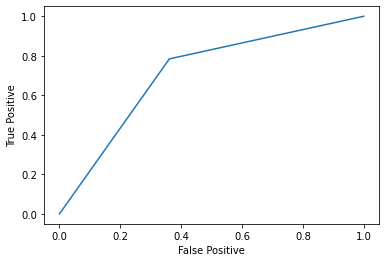

In [57]:
plt.plot(fpr,tpr);
plt.xlabel("False Positive");
plt.ylabel("True Positive")

In [58]:
metrics.auc(fpr,tpr)

0.7115186382125146

Text(0, 0.5, 'True Positive')

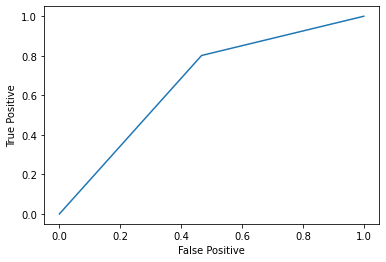

In [59]:
#testing data
fpr1,tpr1,threshold=metrics.roc_curve(y_test,y_pred_test)
plt.plot(fpr1,tpr1);
plt.xlabel("False Positive");
plt.ylabel("True Positive")

In [60]:
metrics.auc(fpr1,tpr1)

0.6671867164428595